In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats

df = pd.read_csv('temp_diff.csv', delimiter='\s*;')
df.shape

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\max\AppData\Local\Temp\ipykernel_7276\2778631841.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('temp_diff.csv', delimiter='\s*;')
C:\Users\max\AppData\Local\Temp\ipykernel_7276\2778631841.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('temp_diff.csv', delimiter='\s*;')


(81, 3)

In [2]:

df.norm_diff = df.norm_diff.str.replace(',', '.')
df.norm_diff_winter = df.norm_diff_winter.str.replace(',', '.')
df.norm_diff = df.norm_diff.astype(np.float64)
df.norm_diff_winter = df.norm_diff_winter.astype(np.float64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            81 non-null     object 
 1   norm_diff         79 non-null     float64
 2   norm_diff_winter  79 non-null     float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [3]:
display(df.head(5))
df.tail(5)

,region,norm_diff,norm_diff_winter
0,Белгородская область,3.4,-1.0
1,Брянская область,2.6,-2.0
2,Владимирская область,1.8,-4.8
3,Воронежская область,2.6,-1.2
4,Ивановская область,1.5,-4.5


,region,norm_diff,norm_diff_winter
76,Амурская область,1.2,-0.1
77,Магаданская область,-0.5,-4.9
78,Сахалинская область,1.5,-2.0
79,Еврейская автономная область,0.4,-0.2
80,Чукотский автономный округ,-1.1,1.4


In [4]:
df.describe()

,norm_diff,norm_diff_winter
count,79.000000,79.000000
mean,1.556962,-1.191139
std,0.986276,2.075016
min,-1.100000,-4.900000
25%,1.000000,-2.900000
50%,1.600000,-1.300000
75%,2.250000,0.600000
max,3.600000,2.300000


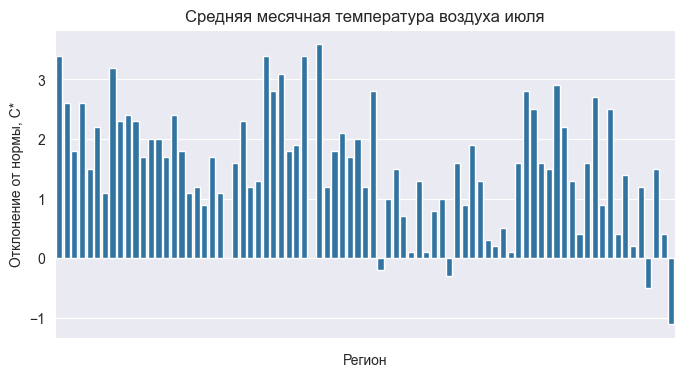

In [5]:
plt.figure(figsize=(8, 4))
ax = sn.barplot(x='region', y='norm_diff', data=df)
ax.set_title("Средняя месячная температура воздуха июля")
ax.set_xlabel('Регион')
ax.set_ylabel('Отклонение от нормы, С*')
plt.gca().set_xticklabels([])
plt.show()

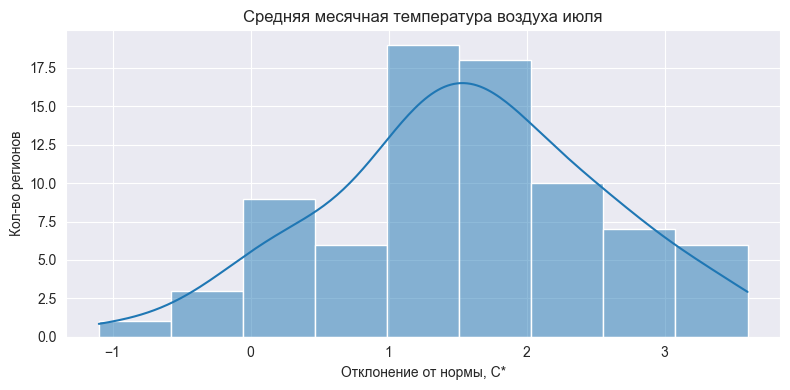

In [6]:
plt.figure(figsize=(8, 4))
ax = sn.histplot(
    df.norm_diff,
    bins="auto",
    kde=True,
)
ax.set_title("Средняя месячная температура воздуха июля")
ax.set_xlabel("Отклонение от нормы, С*")
ax.set_ylabel("Кол-во регионов")
plt.tight_layout()
plt.show()


In [7]:
df.describe().round(2)

,norm_diff,norm_diff_winter
count,79.00,79.00
mean,1.56,-1.19
std,0.99,2.08
min,-1.10,-4.90
25%,1.00,-2.90
50%,1.60,-1.30
75%,2.25,0.60
max,3.60,2.30


In [8]:
print(df.norm_diff.median())
print(df.norm_diff.var())
print(df.norm_diff.skew())

print((df.norm_diff.std() / df.norm_diff.mean()) * 100)

print(df.norm_diff.mode())

1.6
0.9727393703343069
-0.15966133333159918
63.34615027461879
0    1.2
1    1.6
Name: norm_diff, dtype: float64


In [9]:
stat, p_value = stats.shapiro(df.norm_diff)

print(f"Статистика теста: {stat:.4f}")
print(f"p-value: {p_value:.4f}")


Статистика теста: nan
p-value: nan


In [10]:
from scipy.stats import t

data = df.norm_diff

mean = data.mean()
std_error = data.sem()
dof = len(data) - 1  # степени свободы

# Критическое значение t-распределения
t_critical = t.ppf(0.975, dof)  # для 95% доверительного интервала

# Расчет интервала
margin_of_error = t_critical * std_error
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print(f"Доверительный интервал: ({ci_lower:.2f}, {ci_upper:.2f})")

Доверительный интервал: (1.34, 1.78)


In [11]:
df.norm_diff.corr(df.norm_diff_winter)


np.float64(0.2176918533119084)

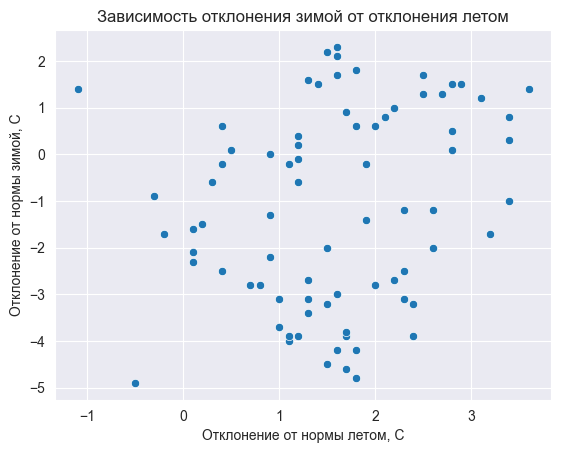

In [12]:
import seaborn as sns

sns.scatterplot(df, x='norm_diff', y='norm_diff_winter')
plt.xlabel("Отклонение от нормы летом, С")
plt.ylabel('Отклонение от нормы зимой, С')
plt.title('Зависимость отклонения зимой от отклонения летом')
plt.show()

In [13]:
import pandas as pd
import numpy as np

def analyze_outliers_iqr(series):
    """
    Полный анализ выбросов по методу IQR
    """
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Находим выбросы
    outliers = series[(series < lower_bound) | (series > upper_bound)]

    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Нижняя граница: {lower_bound:.2f}")
    print(f"Верхняя граница: {upper_bound:.2f}")
    print(f"Выбросы: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Значения выбросов: {outliers.tolist()}")

    return outliers

# Применяем к вашим данным
outliers = analyze_outliers_iqr(df.norm_diff)

Q1 (25%): 1.00
Q3 (75%): 2.25
IQR: 1.25
Нижняя граница: -0.88
Верхняя граница: 4.12
Выбросы: 1
Значения выбросов: [-1.1]


In [15]:
import pandas as pd
import numpy as np
from scipy import stats

# допустим, у вас есть данные в pandas Series
data = df.norm_diff

# расчёт параметров
alpha = 0.05
n = len(data)
mean = data.mean()
std = data.std(ddof=1)   # выборочное стандартное отклонение (ddof=1)

# t-критическое значение
t_crit = stats.t.ppf(1 - alpha/2, df=n-1)

# доверительный интервал
lower = mean - t_crit * std / np.sqrt(n)
upper = mean + t_crit * std / np.sqrt(n)

print(f"95% доверительный интервал: [{lower:.2f}, {upper:.2f}]")


95% доверительный интервал: [1.34, 1.78]


In [18]:
# доверительный интервал для дисперсии
import math
chi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
chi2_upper = stats.chi2.ppf(1 - alpha/2, df=n-1)

var = data.var(ddof=1)

var_lower = (n-1) * var / chi2_upper
var_upper = (n-1) * var / chi2_lower

print(f"Доверительный интервал для дисперсии: [{var_lower:.3f}, {var_upper:.3f}]")
print(f"Доверительный интервал для дисперсии: [{math.sqrt(var_lower):.3f}, {math.sqrt(var_upper):.3f}]")


Доверительный интервал для дисперсии: [0.730, 1.362]
Доверительный интервал для дисперсии: [0.854, 1.167]


C:\Users\max\AppData\Local\Temp\ipykernel_7276\2374404811.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


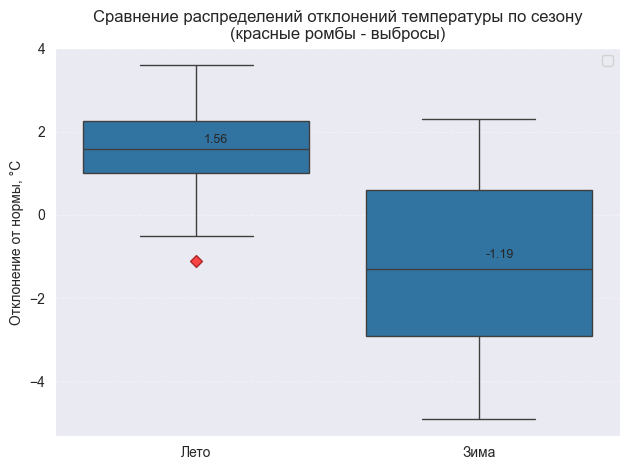

In [34]:
df = df.reset_index(drop=True)

df_long = pd.DataFrame({
    'season': ['Лето'] * len(df) + ['Зима'] * len(df),
    'deviation': pd.concat([df['norm_diff'], df['norm_diff_winter']])
})

df_long = df_long.reset_index()
ax = sns.boxplot(
    x='season',
    y='deviation',
    data=df_long,
    # palette='pastel',
    flierprops=dict(
        marker='D',           # ромбовидные маркеры для выбросов
        markerfacecolor='red',
        markersize=6,
        markeredgecolor='darkred',
        alpha=0.7
    )
)
#
# Добавляем средние значения
means = df_long.groupby('season')['deviation'].mean()
for i, mean in enumerate(means):
    # plt.scatter((i+1)%2, mean, color='blue', s=100, zorder=10, label='Среднее' if i == 0 else "")
    plt.annotate(f'{mean:.2f}', ((i+1)%2, mean),
                 xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.title('Сравнение распределений отклонений температуры по сезону\n(красные ромбы - выбросы)')
plt.ylabel('Отклонение от нормы, °C')
plt.xlabel('')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()